***Tiền xử lý dữ liệu***

In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
%matplotlib inline
import matplotlib
matplotlib.rcParams["figure.figsize"] = (16, 8)
import warnings
warnings.filterwarnings('ignore')
import plotly.express as px
import plotly.graph_objects as go

**Đọc dữ liệu**

In [4]:
# đọc dữ liệu
data = pd.read_excel("D:\\ML\\bt-hoc-kgs\\score.xlsx")

# in ra 5 dòng đầu tiên của dữ liệu
data.head()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,Yes,9,1,91
1,4,82,No,4,2,65
2,8,51,Yes,7,2,45
3,5,52,Yes,5,2,36
4,7,75,No,8,5,66


In [5]:
# tóm tắt thông tin dữ liệu
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column                            Non-Null Count  Dtype 
---  ------                            --------------  ----- 
 0   Hours Studied                     10000 non-null  int64 
 1   Previous Scores                   10000 non-null  int64 
 2   Extracurricular Activities        10000 non-null  object
 3   Sleep Hours                       10000 non-null  int64 
 4   Sample Question Papers Practiced  10000 non-null  int64 
 5   Performance Index                 10000 non-null  int64 
dtypes: int64(5), object(1)
memory usage: 468.9+ KB


In [6]:
# kiểm tổng hàng và cột của dữ liệu
data.shape

(10000, 6)

In [7]:
# Nội dung của từng cột dữ liệu
data.columns

Index(['Hours Studied', 'Previous Scores', 'Extracurricular Activities',
       'Sleep Hours', 'Sample Question Papers Practiced', 'Performance Index'],
      dtype='object')

**Làm sạch dữ liệu**

In [8]:
data.isnull().sum()

Hours Studied                       0
Previous Scores                     0
Extracurricular Activities          0
Sleep Hours                         0
Sample Question Papers Practiced    0
Performance Index                   0
dtype: int64

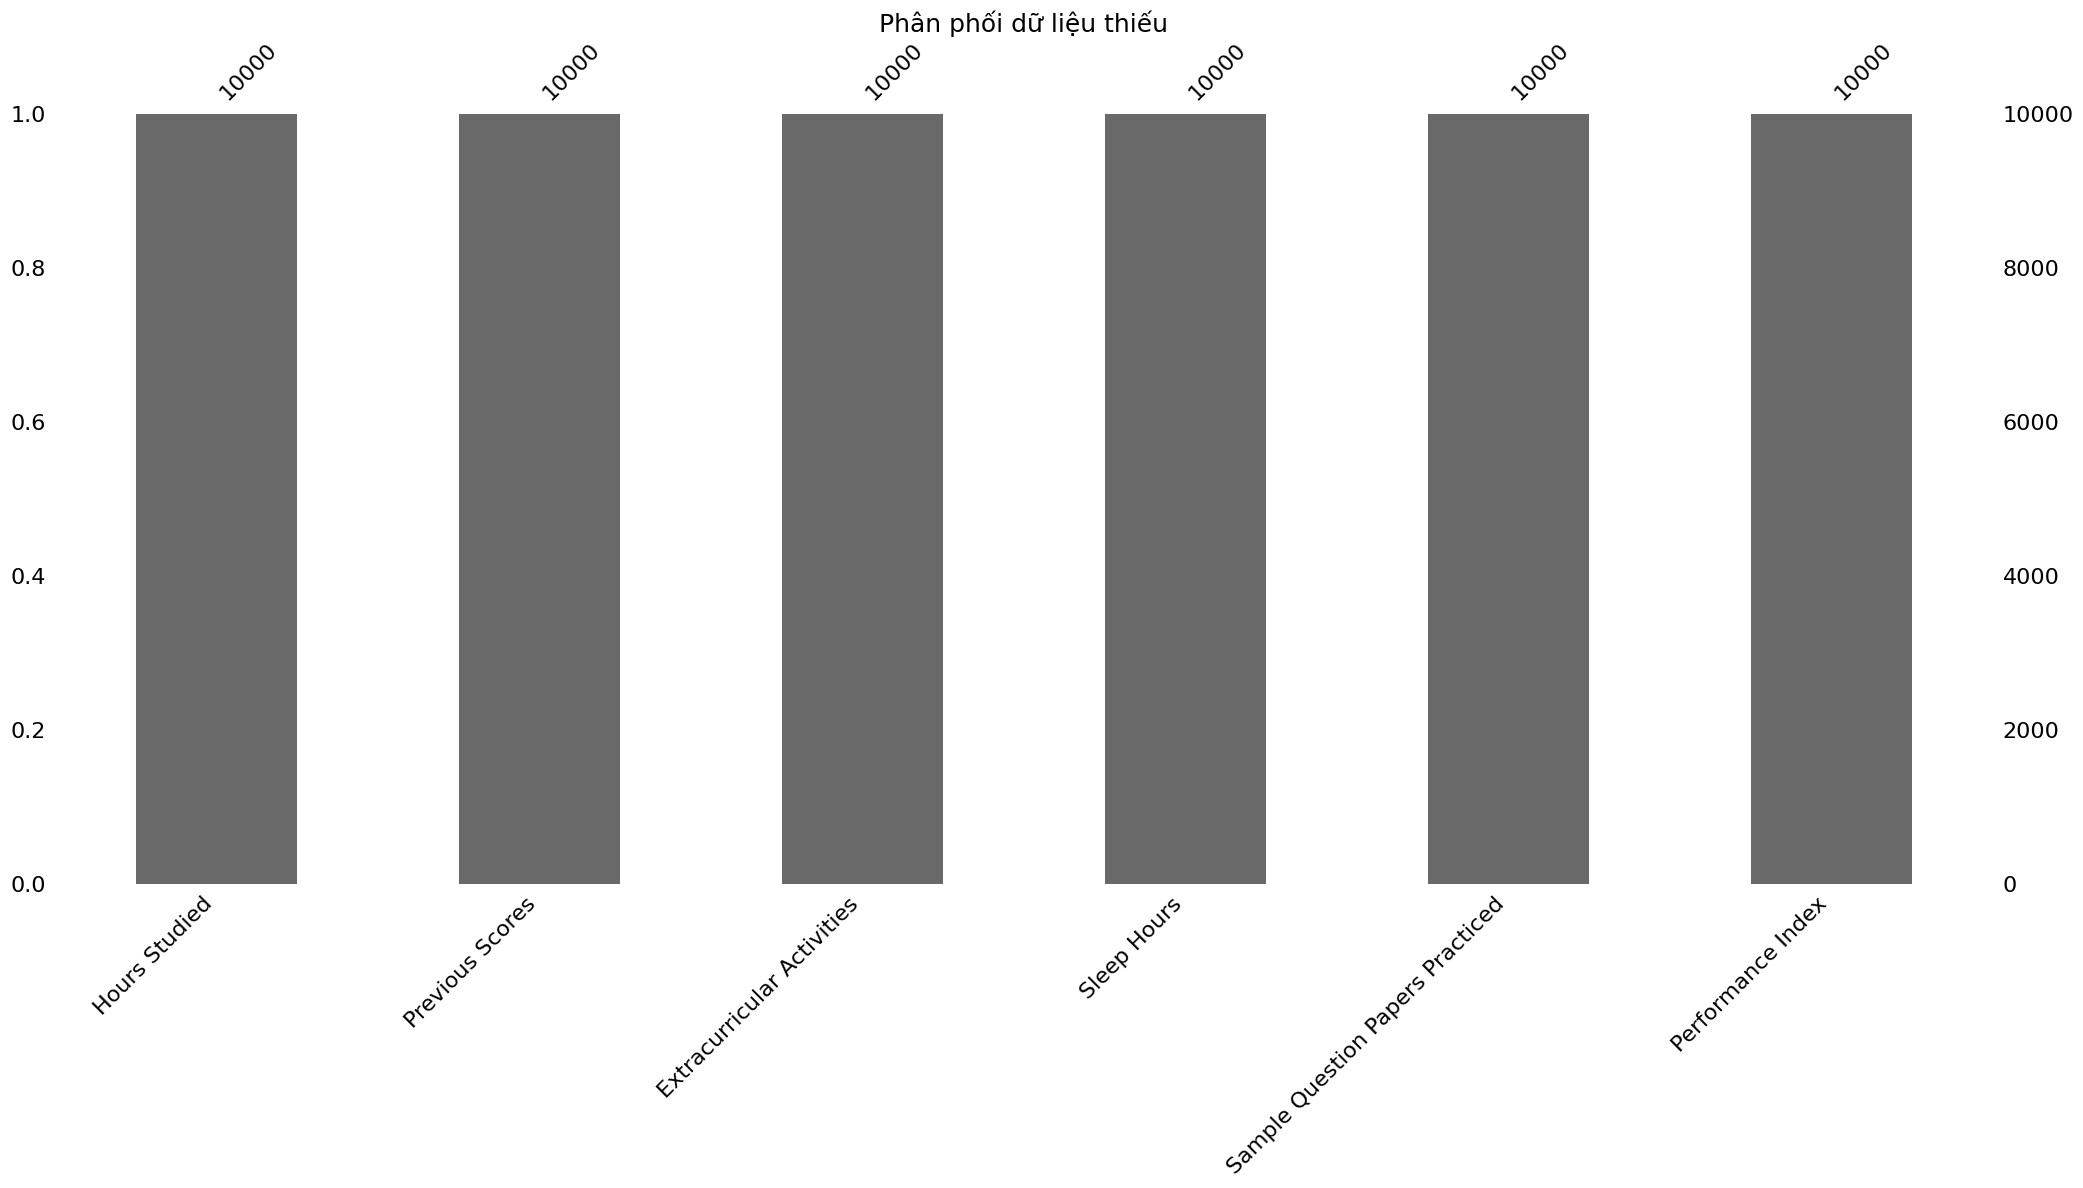

In [9]:
msno.bar(data)
plt.title("Phân phối dữ liệu thiếu", fontsize = 18)
plt.show()

In [10]:
data.duplicated().sum()

127

In [11]:
# Xác định các hàng trùng lặp
duplicated_rows = data.duplicated()

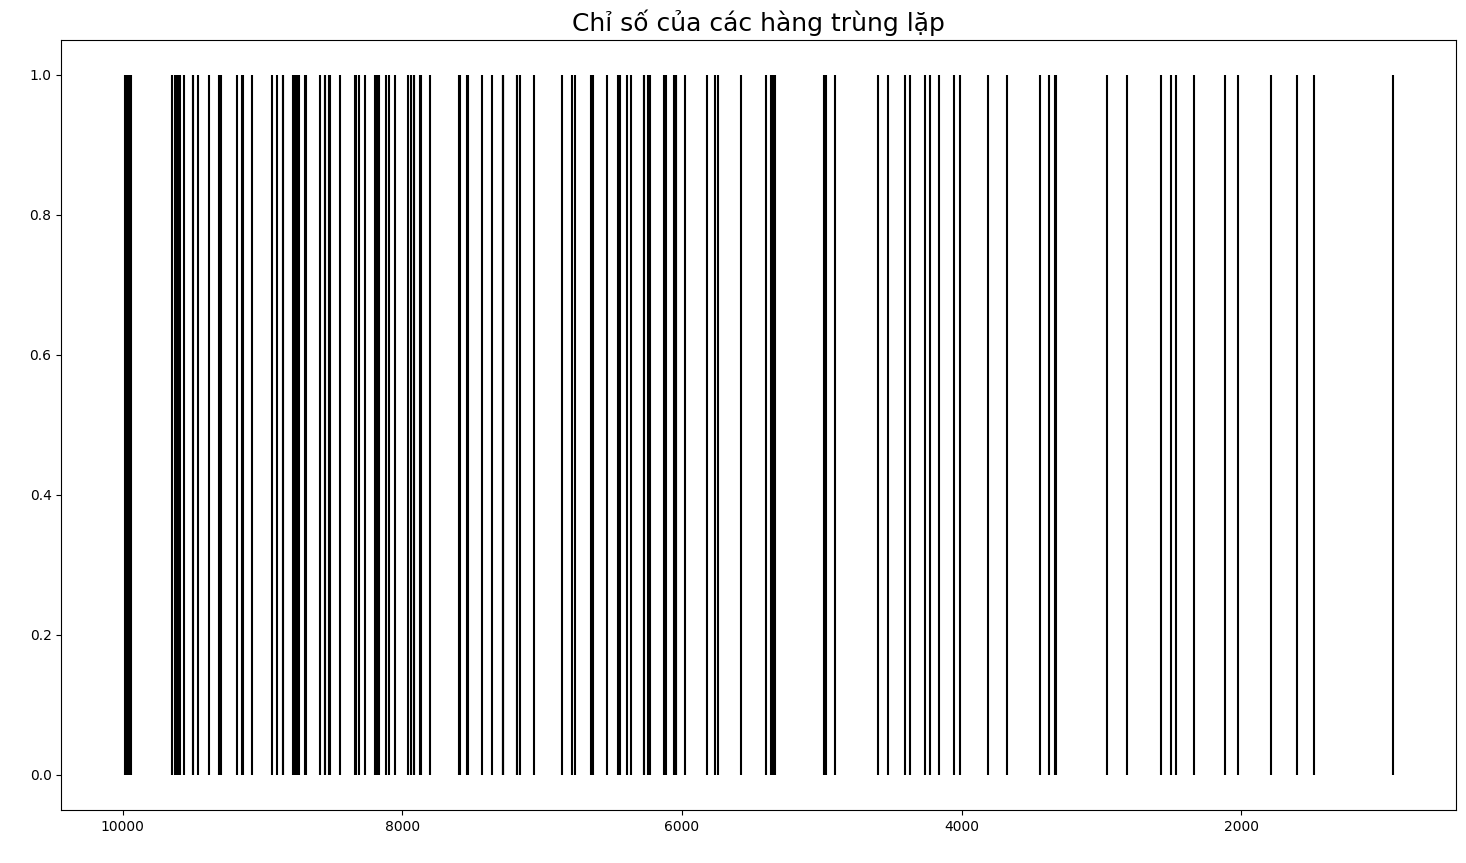

In [12]:
# Tạo một DataFrame mới để lưu số thứ tự của hàng và xác định liệu chúng có bị trùng lặp không
duplicates_data = pd.DataFrame({
    'Row': range(1, len(data) + 1),
    'Duplicated': duplicated_rows
})

# Lọc ra chỉ các hàng đã trùng lặp
duplicates_data = duplicates_data[duplicates_data['Duplicated']]

# Vẽ chúng dưới dạng đường thẳng màu đen
plt.figure(figsize=(18, 10))
plt.vlines(x=duplicates_data['Row'], ymin=0, ymax=1, color='black')
plt.gca().invert_xaxis() # Đảo ngược trục x
plt.title("Chỉ số của các hàng trùng lặp", fontsize = 18)
plt.xlabel(" ")
plt.ylabel(" ")
plt.show()

In [15]:
# Kiểm tra các hàng có giá trị trùng lặp
duplicate_rows = data[data.duplicated()]

# In ra các hàng có giá trị trùng lặp
print("Các hàng có giá trị trùng lặp:")
print(duplicate_rows)

Các hàng có giá trị trùng lặp:
      Hours Studied  Previous Scores Extracurricular Activities  Sleep Hours  \
915               9               52                         No            5   
1477              7               61                        Yes            6   
1601              5               99                         No            7   
1786              2               62                        Yes            9   
2026              5               87                        Yes            6   
...             ...              ...                        ...          ...   
9644              4               91                        Yes            4   
9940              8               95                         No            5   
9954              6               97                         No            8   
9966              1               41                         No            7   
9985              8               99                         No            5   

      Sa

In [17]:
# Xử lý dữ liệu trùng lặp bằng cách kết hợp thông tin từ các dòng trùng lặp
grouped_data = data.groupby(['Hours Studied', 'Previous Scores', 'Extracurricular Activities', 'Sleep Hours', 'Sample Question Papers Practiced'])

# Áp dụng hàm tổng hợp, ví dụ: lấy giá trị trung bình của 'Performance Index'
result_data = grouped_data.agg({'Performance Index': 'mean'}).reset_index()

# In ra kết quả
print(result_data)

      Hours Studied  Previous Scores Extracurricular Activities  Sleep Hours  \
0                 1               40                         No            4   
1                 1               40                         No            4   
2                 1               40                         No            5   
3                 1               40                         No            5   
4                 1               40                         No            6   
...             ...              ...                        ...          ...   
9203              9               99                        Yes            5   
9204              9               99                        Yes            7   
9205              9               99                        Yes            8   
9206              9               99                        Yes            8   
9207              9               99                        Yes            8   

      Sample Question Papers Practiced 

In [19]:
result_data.duplicated().sum()

0

**Xử lý dữ liệu nhiễu**

In [21]:
result_data.describe()

,Hours Studied,Previous Scores,Sleep Hours,Sample Question Papers Practiced,Performance Index
count,9208.000000,9208.000000,9208.000000,9208.000000,9208.000000
mean,4.984904,69.468831,6.526064,4.576455,55.223465
std,2.585329,17.300082,1.698642,2.869036,19.219147
min,1.000000,40.000000,4.000000,0.000000,11.000000
25%,3.000000,54.000000,5.000000,2.000000,40.000000
50%,5.000000,69.000000,7.000000,5.000000,55.000000
75%,7.000000,85.000000,8.000000,7.000000,70.500000
max,9.000000,99.000000,9.000000,9.000000,100.000000


In [24]:
# Chọn cột muốn xử lý nhiễu (ví dụ: 'Hours Studied')
column_to_process = 'Hours Studied'

# Tính giá trị Q1 (25th percentile) và Q3 (75th percentile)
Q1 = result_data[column_to_process].quantile(0.25)
Q3 = result_data[column_to_process].quantile(0.75)

# Tính khoảng IQR (Interquartile Range)
IQR = Q3 - Q1

# Xác định ngưỡng cho việc xác định giá trị nhiễu
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Lọc ra các dòng không chứa giá trị nhiễu
filtered_data = result_data[(result_data[column_to_process] >= lower_bound) & (result_data[column_to_process] <= upper_bound)]

# In ra số lượng dữ liệu trước và sau khi xử lý nhiễu
print(f"Số lượng dữ liệu trước xử lý nhiễu: {len(result_data)}")
print(f"Số lượng dữ liệu sau xử lý nhiễu: {len(filtered_data)}")

Số lượng dữ liệu trước xử lý nhiễu: 9208
Số lượng dữ liệu sau xử lý nhiễu: 9208


In [27]:
filtered_data.isnull().sum().sum()

0

**Chuyển hóa dữ liệu**

- Kiểm tra từng thuộc tính độc lập

In [28]:
def summarize_dataframe(clean_data):

    # In ra số lượng bản ghi và cột
    print(f"\nCó {len(result_data)} bản ghi và {len(result_data.columns)} thuộc tính/cột")

    # Xác định các thuộc tính số học
    numeric_features = result_data.select_dtypes(include=[np.number]).columns.tolist()

    # Xác định các thuộc tính phân loại
    categorical_features = result_data.select_dtypes(exclude=[np.number]).columns.tolist()

    # In ra số lượng thuộc tính số học và từng thuộc tính
    print(f"\nCó {len(numeric_features)} thuộc tính numeric: \n")
    for i, feature in enumerate(numeric_features, 1):
        print(f"{i}. {feature}\n")

        # In ra số lượng thuộc tính phân loại và từng thuộc tính
    print(f"\nCó {len(categorical_features)} thuộc tính categorical:\n")
    for i, feature in enumerate(categorical_features, 1):
            print(f"{i}. {feature} \n")
            
summarize_dataframe(result_data)


Có 9208 bản ghi và 6 thuộc tính/cột

Có 5 thuộc tính numeric: 

1. Hours Studied

2. Previous Scores

3. Sleep Hours

4. Sample Question Papers Practiced

5. Performance Index


Có 1 thuộc tính categorical:

1. Extracurricular Activities 



- Chuyển dữ liệu có thuộc tính categorical về dữ liệu số

In [31]:
data_type_area_income = filtered_data['Extracurricular Activities'].dtype
print(data_type_area_income)

object


In [36]:
# Chọn cột muốn chuyển đổi (ví dụ: 'Extracurricular Activities')
column_to_convert = 'Extracurricular Activities'

# Sử dụng phương thức map
filtered_data[column_to_convert] = filtered_data[column_to_convert].map({'Yes': 1, 'No': 0})

- Chuẩn hóa dữ liệu bằng phương pháp Min - max normalization

In [44]:
from sklearn.preprocessing import MinMaxScaler

# Tạo một đối tượng MinMaxScaler
scaler = MinMaxScaler()

# Chọn các cột cần chuẩn hóa
columns_to_scale = ['Hours Studied', 'Previous Scores', 'Extracurricular Activities', 'Sleep Hours', 'Sample Question Papers Practiced']

# Chuẩn hóa Min-Max
filtered_data[columns_to_scale] = scaler.fit_transform(filtered_data[columns_to_scale])

# Hiển thị kết quả
print(filtered_data)

      Hours Studied  Previous Scores  Extracurricular Activities  Sleep Hours  \
0               0.0              0.0                         0.0          0.0   
1               0.0              0.0                         0.0          0.0   
2               0.0              0.0                         0.0          0.2   
3               0.0              0.0                         0.0          0.2   
4               0.0              0.0                         0.0          0.4   
...             ...              ...                         ...          ...   
9203            1.0              1.0                         1.0          0.2   
9204            1.0              1.0                         1.0          0.6   
9205            1.0              1.0                         1.0          0.8   
9206            1.0              1.0                         1.0          0.8   
9207            1.0              1.0                         1.0          0.8   

      Sample Question Paper

- Xuất dữ liệu xlsx

In [45]:
filtered_data.to_excel('D:\\ML\\bt-hoc-kgs\\score-data-da-xu-ly.xlsx', index=True)